In [9]:
# Libraries for Data Manipulation
import pandas as pd

# Libraries for Cleaning Tweets
import re
import string
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from textblob import TextBlob

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Loading the Dataset
df = pd.read_csv('chatgpt_tweets.csv')

In [12]:
df.sample(5)

,Unnamed: 0,Date,User,Tweet
27085,27084,2023-03-12 20:38:28+00:00,writingclearsci,ChatGTP’s (current) ability to reliably quote ...
26975,26974,2023-03-12 21:35:23+00:00,G3Billionaire,If you sell courses on how to win government c...
13272,13272,2023-03-15 22:13:02+00:00,stoiandan22,"Ok, looks like #ChatGPT is #Protestant 😂\n#Chr..."
16350,16350,2023-03-15 12:00:23+00:00,searchlabs,📣Everyone's talking about ChatGPT! But is it w...
2139,2139,2023-03-18 09:16:59+00:00,Michael04192304,Better than us : Accept me for who I am cause ...


In [13]:
# Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"you're", 'can', 'had', 'where', 'the', 'of', 'myself', 'not', 'for', 'most', 'against', 'but', 'our', 'him', 'wasn', 'those', 'be', 'm', 'why', 'aren', 'needn', 'and', 'here', 'mustn', 'shan', 'while', "couldn't", 'we', 'then', 'ain', 'again', 'now', 'before', 'too', 'to', "mustn't", 'd', 'been', 'will', 'hasn', 'she', 'out', 'that', 'o', "needn't", 'an', 'nor', 'did', 're', 'above', 'me', 'how', 'other', 'isn', 'having', 'all', 'll', 't', 'more', "isn't", 'his', "don't", 'during', 'themselves', "shan't", 'there', "should've", 'didn', 'their', 'itself', 'doing', 'than', 'below', 'do', 'you', 'if', "won't", 'in', 'he', 'between', 'don', "haven't", 'i', 'her', 'through', 'they', 'ourselves', 'no', 'doesn', "hasn't", 'have', 'so', 'hers', 'yourselves', 'very', 'both', 'its', 'or', 'over', 'into', "wouldn't", 'such', 'yours', "you'll", 'whom', 'further', 'yourself', 'own', 'this', 'off', 'himself', 'under', "didn't", "mightn't", "weren't", 've', 'until', 'should', "you've", 'being', "sho

In [15]:
# This function is going to clean each tweet inside df['Tweet']


def cleanTweet(tweet):
    
    if type(tweet) == str:
        
        # Convert the tweet into a lowercase text
        tweet = tweet.lower()
        # Remove emojies inside the tweet
        tweet = demoji.replace(tweet,"")
        tweet = re.sub('\n',' ',tweet)
        # Remove special chars inside the tweet
        tweet = re.sub(r'@\w+|\#','',tweet)
        # Remove punctations
        tweet = tweet.translate(str.maketrans("","",string.punctuation))
        # Remove urls
        tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE)
        # Remove stopwords
        stop_words = set(nltk.corpus.stopwords.words('english'))
        filtered_words = [word for word in TextBlob(tweet).words if word not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in filtered_words]
        # Stemming
        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
        # Remove apostrophes
        tweet = re.sub(r"\'", "", " ".join(stemmed_words))
        
        return tweet
        

In [16]:
df['cleanTweet'] = df['Tweet'].map(cleanTweet)

In [17]:
df.sample(5)

,Unnamed: 0,Date,User,Tweet,cleanTweet
5374,5374,2023-03-17 13:27:56+00:00,MostBay,"BoutiqueHotel(.)com SOLD for $40,000 at Sedo, ...",boutiquehotelcom sell 40000 sedo 2009 mine ava...
18830,18829,2023-03-15 00:57:56+00:00,Mslinguistic,#ChatGPT's self-reported language proficiencie...,chatgpt selfreport languag profici rank tradit...
16007,16007,2023-03-15 13:01:00+00:00,Hall_Web,14 Powerful AI Tools\n\n#AI #ChatGPT #Copywrit...,14 power ai tool ai chatgpt copywrit artificia...
5658,5658,2023-03-17 12:21:26+00:00,Braahmam,@Braahmam is excited to share that we will be...,excit share attend slatorcon remot march 22nd ...
12262,12262,2023-03-16 04:20:44+00:00,thejeetupadhyay,"3/\n\nWith ChatGPT, law students and advocates...",3 chatgpt law student advoc gener legal docume...


In [18]:
# Sentiment Analysis

def get_sentiment(tweet):

  if type(tweet) == str:

    blob = TextBlob(tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    if sentiment_polarity > 0 :
      sentiment_label = "Positive"
    elif sentiment_polarity < 0 :
      sentiment_label = "Negative"
    else:
      sentiment_label = "Neutral"
    
    result =  {'polarity':sentiment_polarity,'subjectivity':sentiment_subjectivity,'sentiment':sentiment_label}
    return result


In [19]:
#
#
or1 = df['cleanTweet'].iloc[11111]
print(f"Tweet: {or1}\n")
get_sentiment(or1)

Tweet: one question ask recent tell student use chatgpt work well put togeth quick video help teacher find clue student work enjoy chatgpt ai gptforc educ innov



{'polarity': 0.24444444444444446,
 'subjectivity': 0.4166666666666667,
 'sentiment': 'Positive'}

In [20]:
df['sentiment_result'] = df['cleanTweet'].apply(get_sentiment)

In [21]:
df['sentiment_result']

0        {'polarity': 0.8, 'subjectivity': 0.75, 'senti...
1        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2        {'polarity': 0.5, 'subjectivity': 0.6, 'sentim...
3        {'polarity': -0.3333333333333333, 'subjectivit...
4        {'polarity': 0.0, 'subjectivity': 0.1, 'sentim...
                               ...                        
29996    {'polarity': 0.5, 'subjectivity': 0.6, 'sentim...
29997    {'polarity': 0.7, 'subjectivity': 0.6000000000...
29998    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
29999    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
30000    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_result, Length: 30001, dtype: object

In [22]:
df = df.join(pd.json_normalize(df['sentiment_result']))

In [23]:
df.sample(5)

,Unnamed: 0,Date,User,Tweet,cleanTweet,sentiment_result,polarity,subjectivity,sentiment
1129,1129,2023-03-18 16:03:03+00:00,OccultPriestess,#Sims4 &amp; #ChatGPT!\nBroken Game? Just put ...,sims4 amp chatgpt break game put error code wa...,"{'polarity': -0.1, 'subjectivity': 0.4, 'senti...",-0.100000,0.400000,Negative
389,389,2023-03-18 20:36:41+00:00,elmas_eth,🎗️New NFT collection\n\n🍿 Peddler\n\n🌊 OpenSea...,new nft collect peddler opensea art nftcollect...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
6601,6601,2023-03-17 07:33:44+00:00,Int0Th1nA1r,"About to use #ChatGPT, landing page @Cloudflar...",use chatgpt land page human verif pentest past...,"{'polarity': -0.25, 'subjectivity': 0.45, 'sen...",-0.250000,0.450000,Negative
22820,22819,2023-03-14 09:31:19+00:00,the_codersguild,Developers! How do we feel about #ChatGPT ??,develop feel chatgpt,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
24739,24738,2023-03-13 16:42:13+00:00,UtomiOnyeka,May ChatGPT not make us lose our creativity.\n...,may chatgpt make us lose creativ chatgpt softw...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [24]:
df['sentiment'].value_counts()

Neutral     15413
Positive    10886
Negative     3701
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

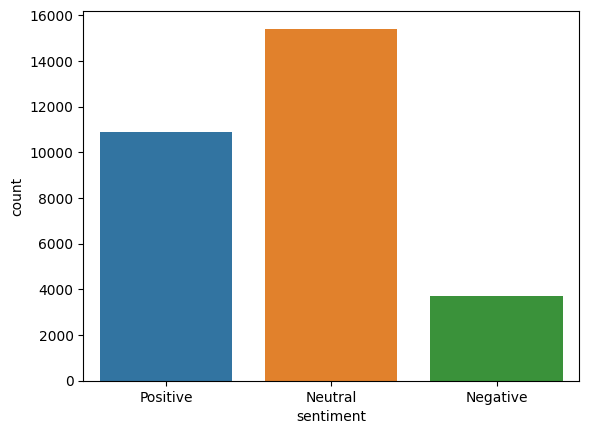

In [25]:
sns.countplot(x='sentiment', data=df)

In [26]:
# Keyword Extraction
# Positive Tweets
positive_tweets = df[df['sentiment']=='Positive']['cleanTweet'].tolist()

In [27]:
# Keyword Extraction
# Negative Tweets
negative_tweets = df[df['sentiment']=='Negative']['cleanTweet'].tolist()

In [28]:
# Keyword Extraction
# Neutral Tweets
neutral_tweets = df[df['sentiment']=='Neutral']['cleanTweet'].tolist()

In [29]:
# Tokenization
positive_tokens = [token for line in positive_tweets for token in line.split()]

In [30]:
# Tokenization
negative_tokens = [token for line in negative_tweets for token in line.split()]

In [31]:
# Tokenization
neutral_tokens = [token for line in neutral_tweets for token in line.split()]

In [32]:
# Get the most common tokens
from collections import Counter

In [33]:

def get_tokens(docx, num=30):

  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result


In [34]:
get_tokens(positive_tokens)

{'chatgpt': 13131,
 'ai': 5943,
 'gpt4': 2386,
 'new': 1954,
 'use': 1895,
 'openai': 1713,
 '’': 1406,
 'like': 1016,
 'get': 964,
 'make': 950,
 'chatgpt4': 947,
 'artificialintellig': 895,
 'gener': 785,
 'write': 765,
 'amp': 755,
 'technolog': 750,
 'latest': 708,
 'gpt': 675,
 'ask': 663,
 'chatbot': 663,
 'tool': 655,
 'learn': 647,
 'good': 641,
 'model': 631,
 'free': 615,
 'time': 611,
 'prompt': 606,
 'chat': 593,
 'creat': 592,
 'work': 577}

In [35]:
common_positive_words = get_tokens(positive_tokens)
common_negative_words = get_tokens(negative_tokens)
common_neutral_words = get_tokens(neutral_tokens)

In [43]:
# Plot With Seaborn
pos_df = pd.DataFrame(common_positive_words.items(), columns=['words','score'])
neg_df = pd.DataFrame(common_negative_words.items(), columns=['words','score'])

In [37]:
pos_df.sample(5)

,words,score
28,creat,592
18,ask,663
16,latest,708
19,chatbot,663
24,free,615


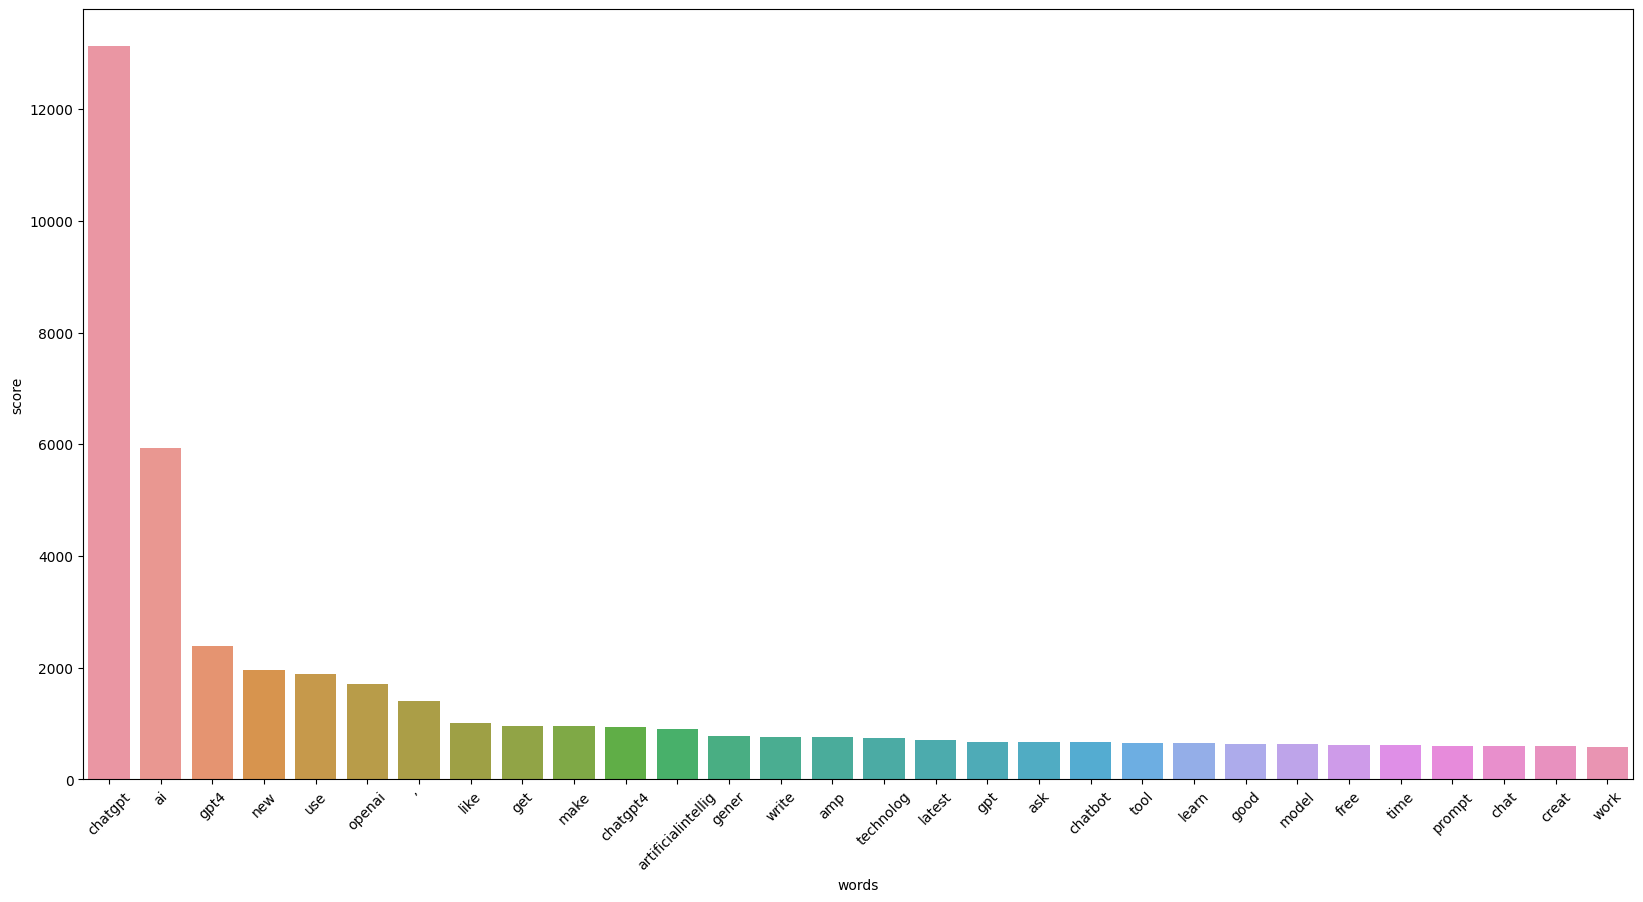

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='score', data=pos_df)
plt.xticks(rotation=45)
plt.show()

In [39]:
def plot_wordCloud(tokens):
  docx = ' '.join(tokens)
  _wordCloud = WordCloud().generate(docx)
  plt.imshow(_wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

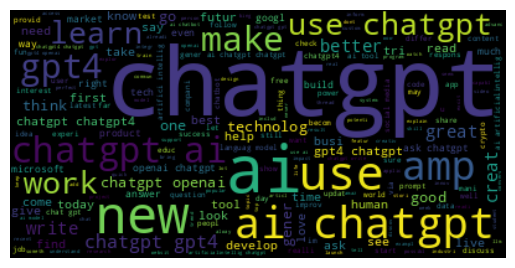

In [40]:
plot_wordCloud(positive_tokens)